<a href="https://colab.research.google.com/github/emyesme/CalcificationDetection/blob/Zarin/calcificationtest1_LBP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#just once to install opencv
!pip install opencv-python

In [2]:
#just once to install matplotlib
!pip install matplotlib

In [3]:
#just once to install numpy
!pip install numpy

In [4]:
#just once to install google.colab
!pip install google-colab

In [5]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os 

#first put a shortcut in your drive to the image processing folder

DATA_DIR = os.path.join('/content',
                        'drive',
                        'MyDrive',
                        'Image Processing and Analysis 2022',
                        'projects',
                        'Calcification Detection',
                        'dataset')

#.join joins the paths according to the requirement, using / in this context

print(os.listdir(DATA_DIR))

['normals.txt', 'images', 'groundtruths', 'masks']


In [7]:
#joins the DATA_DIR address with the subfolder and makes it a directory

os.listdir(DATA_DIR + "/groundtruths")

os.listdir(DATA_DIR + "/images")

os.listdir(DATA_DIR + "/masks")

['20586908_6c613a14b80a8591_MG_R_CC_ANON.mask.png',
 '20587080_b6a4f750c6df4f90_MG_R_ML_ANON.mask.png',
 '20586986_6c613a14b80a8591_MG_L_ML_ANON.mask.png',
 '20586934_6c613a14b80a8591_MG_L_CC_ANON.mask.png',
 '20586960_6c613a14b80a8591_MG_R_ML_ANON.mask.png',
 '20587226_fd746d25eb40b3dc_MG_L_ML_ANON.mask.png',
 '20587346_e634830794f5c1bd_MG_R_ML_ANON.mask.png',
 '20587148_fd746d25eb40b3dc_MG_R_CC_ANON.mask.png',
 '20587294_e634830794f5c1bd_MG_R_CC_ANON.mask.png',
 '20587200_fd746d25eb40b3dc_MG_R_ML_ANON.mask.png',
 '20587320_e634830794f5c1bd_MG_L_CC_ANON.mask.png',
 '20587174_fd746d25eb40b3dc_MG_L_CC_ANON.mask.png',
 '20587544_d571b5880ad2a016_MG_R_CC_ANON.mask.png',
 '20587492_d571b5880ad2a016_MG_R_ML_ANON.mask.png',
 '20587466_d571b5880ad2a016_MG_L_CC_ANON.mask.png',
 '20587518_d571b5880ad2a016_MG_L_ML_ANON.mask.png',
 '20587612_f4b2d377f43ba0bd_MG_R_CC_ANON.mask.png',
 '20587372_e634830794f5c1bd_MG_L_ML_ANON.mask.png',
 '20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.mask.png',
 '20587758_8

In [8]:
#import opencv
import cv2

In [9]:
# preprocessing
# here explain what you code
def preprocessing(matrix, mask):
  preprocessed = matrix
  return preprocessed

In [10]:
# candidateExtraction
# here explain what you code
def candidateExtraction(matrix, mask):
  candidates = matrix
  return candidates

In [18]:
# featuresExtraction
# here explain what you code
def featuresExtractionLBP(matrix, mask):

  from skimage.feature import local_binary_pattern

  radius= 1
  points= 8 * radius

      
  featuresLBP = local_binary_pattern(matrix, points, radius, method='default')      

  return featuresLBP

In [12]:
#import show special for google colab
from google.colab.patches import cv2_imshow
#import plt for display
import matplotlib.pyplot as plt

#go into de directory of the images

# this have 3 outputs root directory, the folders in the path and the files in the path.
# we ignore _ the two first because we are not interested in those
_, _, images = next(os.walk(os.path.join(DATA_DIR,'images')))
_, _, breastMasks = next(os.walk(os.path.join(DATA_DIR,'masks')))
_, _, groundTruths = next(os.walk(os.path.join(DATA_DIR, 'groundtruths')))

#ignored the space (_) and comma
#_ instead of a variable since we won't need the roots and directories that next goes through before it reaches the name
#next creates an object that contains items that can be gone through

images.sort()
breastMasks.sort()
groundTruths.sort()

# read numbers of normal images
normals = []
with open(os.path.join(DATA_DIR,'normals.txt')) as f:
    for line in f:
        normals.append(line[:-1]) 
        # -1 removes the last digit
        #: refers to the first index
        # \n is considered one character

print(normals)

['22678622', '22678646', '22678670', '22678694', '22580192', '22580218', '22580244', '22580270', '22670620', '22670643', '22670673', '22670703', '53581379', '53581406', '53581433', '53581460', '27829161', '27829215', '22670442', '22670488', '53581769', '53581796', '24065530', '24065584', '24055600', '24055654', '50999459', '51048738', '51048765', '20588308', '20588334', '22580367', '22580419', '22670278', '22670324', '53582540', '53582567', '53586361', '53586388', '53586415', '53586442', '53581860', '53581914', '20588138', '20588164', '20588190', '20588216', '50997053', '50997080', '20587758', '20587810', '53582395', '53582449', '50999121', '50999175', '50999273', '50999327', '50994706', '50994733', '50994760', '50994787', '50994814', '50994868', '22613944', '22613996', '24065380', '24065407', '24065434', '24065461', '53581237', '53581264', '22580492', '22580520', '22580548', '22580576', '53582304', '53582331', '53587690', '53587744', '24054997', '24055051', '24065270', '24065308', '50

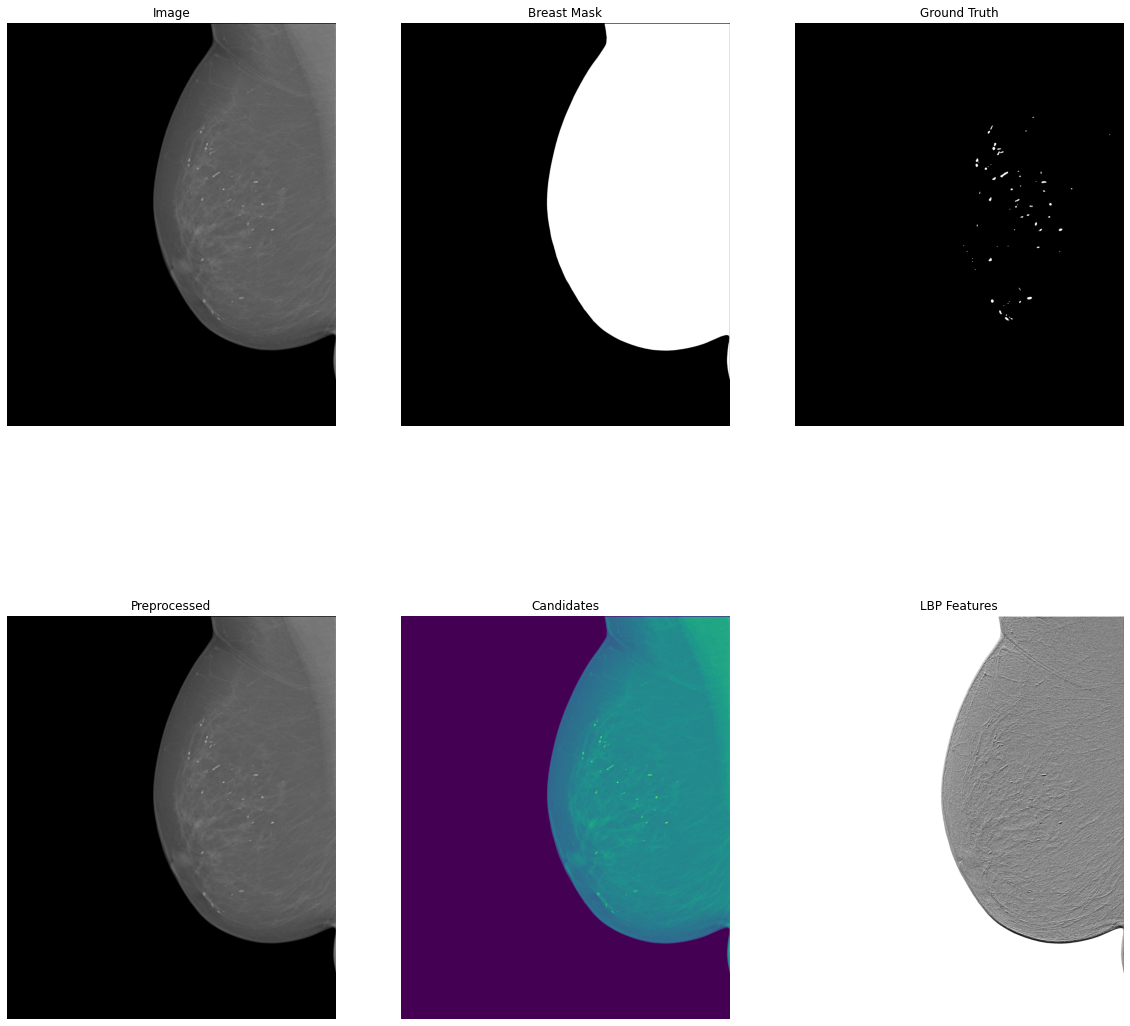

In [20]:

#go through the image files 
for image, breastMask, groundTruth in zip(images, breastMasks, groundTruths):
  # zip goes through through 3 iterators at the same time instead of having nested for loops
  
  # choose one
  # this are the last 4 of the number of the image name {numbers}_{}_{}_{}_{}_{}.tif
  # i suppose those are unique
  # if your code is working try other images!
  #print(breastMask)
  
  # 20588020, 7717, 5328, 3787, 5725, 3859, 6934, 50995872
  digits = '5328'

  if ((digits in image) and (digits in breastMask) and ('mask' in breastMask)):
    #upload
    img = cv2.imread(os.path.join(DATA_DIR,'images',image))
    imgMask = cv2.imread(os.path.join(DATA_DIR, 'masks', breastMask))
    imgGroundTruth = cv2.imread(os.path.join(DATA_DIR, 'groundtruths', image))

    # here you can prove things in the image

    # preprocessing
    preprocessed = preprocessing(img, imgMask)

    # candidate extraction
    candidates = candidateExtraction(preprocessed, imgMask)

    # feature extraction
    candidates = cv2.cvtColor(candidates, cv2.COLOR_BGR2GRAY)
    featuresLBP = featuresExtractionLBP(candidates, imgMask)

    # display related

    # matrix of plots and size of the figure
    figure, axis = plt.subplots(2, 3, figsize=(20,20))

    # draw in the axis the img
    axis[0][0].imshow(img)
    # switch off the axis of the plot
    axis[0][0].axis('off')
    # set a title for the plot
    axis[0][0].set_title('Image')

    axis[0][1].imshow(imgMask)
    axis[0][1].axis('off')
    axis[0][1].set_title('Breast Mask')

    axis[0][2].imshow(imgGroundTruth)
    axis[0][2].axis('off')
    axis[0][2].set_title('Ground Truth')

    axis[1][0].imshow(preprocessed)
    axis[1][0].axis('off')
    axis[1][0].set_title('Preprocessed')

    axis[1][1].imshow(candidates)
    axis[1][1].axis('off')
    axis[1][1].set_title('Candidates')

    axis[1][2].imshow(featuresLBP, cmap=plt.cm.gray)
    axis[1][2].axis('off')
    axis[1][2].set_title('LBP Features')

    # display figure with image
    plt.show()

    # display image with other function
    #cv2_imshow(features)
    #displays one enlarged image


In [ ]:
# save images

cv2.imwrite(os.path.join('/content',
                        'drive',
                        'MyDrive',
                        'Results',
                         "image1.png"),
            features)